# Social Data Analysis and Visualisation Project

### Import Relevant Packages

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
import sklearn as sk
import sklearn.preprocessing as prep
import pydotplus
import plotly.express as px

from scipy import stats
from folium import plugins
from folium.plugins import HeatMapWithTime, MarkerCluster, HeatMap
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.palettes import Category20_14
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

# set global plot style
sns.set(style='ticks', palette='muted', color_codes=True)

# setup bokeh for jupyter notebooks
output_notebook()

C:\Users\betha\Anaconda3\envs\dataviz\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



Loading BokehJS ...

### Initialisation Output Style

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

# set global plot style
sns.set(style='ticks', palette='muted', color_codes=True)

C:\Users\betha\Anaconda3\envs\dataviz\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



### Load in the Data

In [3]:
cases_data = pd.read_csv("cases_by_day.csv", index_col = 0)
deaths_data = pd.read_csv("deaths_by_day.csv", index_col = 0)
recovered_data = pd.read_csv("recovered_by_day.csv", index_col = 0)
worldbank_data = pd.read_csv("worldbank_and_press_freedom.csv",index_col=0)
responses_data = pd.read_csv("corona_policies_cleaned.csv",index_col =0)

### Heat Map Movie

In [4]:
# unsure how to create the list of lists required for the heat map movie plugin

In [5]:
lat_lon_confirmed = pd.read_csv("lat_lon_confirmed.csv", index_col = 0)
lat_lon_confirmed = lat_lon_confirmed.reset_index()
lat_lon_confirmed

,Lat,Long,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,1/02/2020,2/02/2020,3/02/2020,4/02/2020,5/02/2020,6/02/2020,7/02/2020,8/02/2020,9/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,1/03/2020,2/03/2020,3/03/2020,4/03/2020,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,25/03/2020,26/03/2020,27/03/2020,28/03/2020,29/03/2020,30/03/2020,31/03/2020,1/04/2020,2/04/2020,3/04/2020,4/04/2020,5/04/2020,6/04/2020,7/04/2020,8/04/2020,9/04/2020,10/04/2020,11/04/2020,12/04/2020,13/04/2020,14/04/2020,15/04/2020,16/04/2020,17/04/2020,18/04/2020,19/04/2020,20/04/2020,21/04/2020,22/04/2020,23/04/2020,24/04/2020,25/04/2020,26/04/2020
0,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
2,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738
4,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26
5,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24
6,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892
7,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746
8,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96,96,99,100,103,103,103,102,103,103,103,103,103,103,104,104,104,104,105,106,106
9,-33.868800,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002


### Slider Plot

### Summary Plot

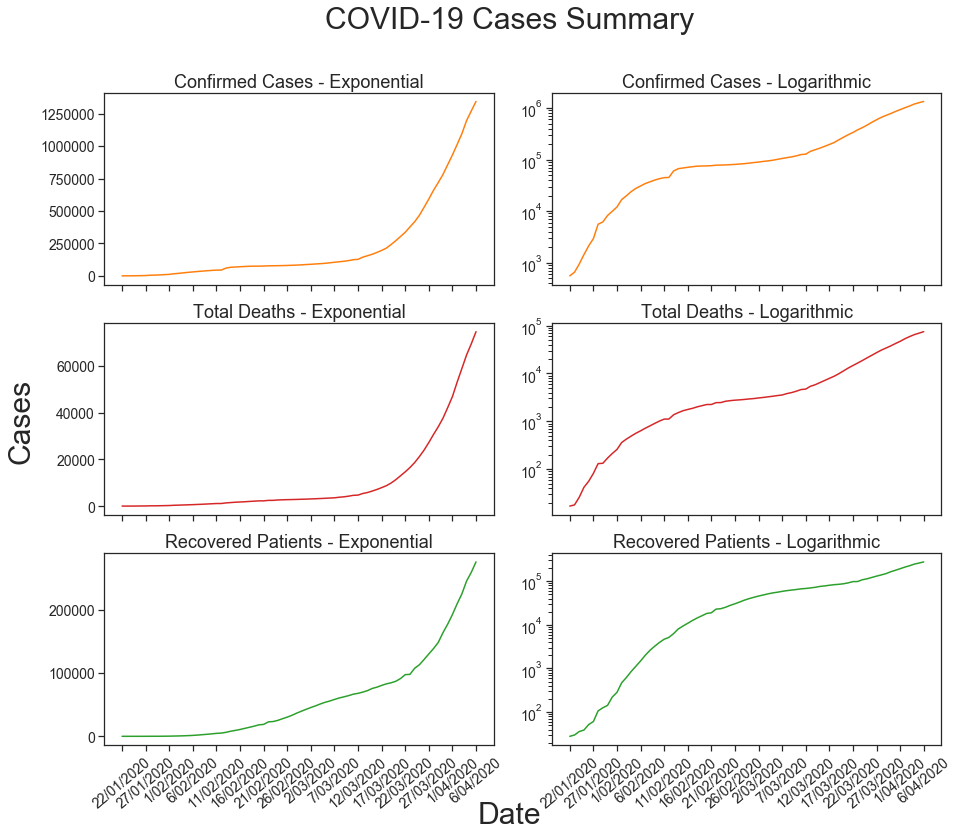

In [6]:
x_ticks = []
i=0
for col in cases_data:
    if(i%5 == 0):
        x_ticks.append(col)
    i = i +1

fig, axs = plt.subplots(3, 2, figsize = (15,12), sharex='col',
                        gridspec_kw={'hspace': 0.2, 'wspace': 0.15})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
fig.suptitle('COVID-19 Cases Summary', fontsize = 30)
ax1.plot(cases_data.columns, cases_data.sum(), 'tab:orange')
ax2.plot(cases_data.columns, cases_data.sum(), 'tab:orange')
ax3.plot(deaths_data.columns, deaths_data.sum(), 'tab:red')
ax4.plot(deaths_data.columns, deaths_data.sum(), 'tab:red')
ax5.plot(recovered_data.columns, recovered_data.sum(), 'tab:green')
ax6.plot(recovered_data.columns, recovered_data.sum(), 'tab:green')

ax1.set(title = "Confirmed Cases - Exponential")
ax2.set(title = "Confirmed Cases - Logarithmic", yscale= "log")
ax3.set(title = "Total Deaths - Exponential")
ax4.set(title = "Total Deaths - Logarithmic", yscale= "log")
ax5.set(title = "Recovered Patients - Exponential")
ax6.set(title = "Recovered Patients - Logarithmic", yscale= "log")

ax1.title.set_size(18)
ax2.title.set_size(18)
ax3.title.set_size(18)
ax4.title.set_size(18)
ax5.title.set_size(18)
ax6.title.set_size(18)

for ax in axs.flat:
    ax.set_xticks(x_ticks)
    ax.tick_params('x', rotation = 40)
    ax.tick_params('y', labelsize ='large')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 

fig.text(0.035, 0.5, "Cases", verticalalignment="center", rotation = 90, fontsize = 30);
fig.text(0.5, 0.035, "Date", horizontalalignment="center", rotation = 0, fontsize = 30);

plt.savefig('COVID_Cases_Plot.png')

### Pandemic Curve Plot

In [7]:
# calculate the daily number of new cases
daily_cases_sub_recovered = cases_data.subtract(recovered_data)
daily_cases_data = daily_cases_sub_recovered.subtract(deaths_data)
daily_cases_data = daily_cases_data.reset_index()
daily_cases_data

,country_code,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,1/02/2020,2/02/2020,3/02/2020,4/02/2020,5/02/2020,6/02/2020,7/02/2020,8/02/2020,9/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,1/03/2020,2/03/2020,3/03/2020,4/03/2020,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,25/03/2020,26/03/2020,27/03/2020,28/03/2020,29/03/2020,30/03/2020,31/03/2020,1/04/2020,2/04/2020,3/04/2020,4/04/2020,5/04/2020,6/04/2020
0,ABW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,4,4,5,5,9,9,11,16,27,32,45,49,49,54,54,59,61,63,63,69
1,AFG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,20,21,21,21,23,23,38,38,72,80,88,104,104,114,164,165,228,257,265,282,327,338
2,AGO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,5,5,4,5,5,5,6,10,12
3,AIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3
4,ALB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,11,22,32,37,41,50,54,57,62,68,72,85,98,108,124,151,147,156,169,168,176,177,185,198,214,237,240
5,AND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,38,38,52,74,87,111,131,162,186,220,263,304,327,352,354,366,403,407,428,457,473
6,ARE,0,0,0,0,0,0,0,4,4,4,4,5,5,5,5,5,5,7,7,8,8,7,7,7,5,5,5,5,5,5,5,9,9,9,9,9,9,14,16,16,16,22,22,24,24,38,38,38,62,57,68,68,68,75,75,75,87,109,107,113,113,158,201,279,279,351,414,509,545,597,745,920,1147,1370,1645,1898
7,ARG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,11,11,16,18,18,29,31,42,53,63,74,91,122,151,259,294,329,327,430,504,600,654,569,787,778,841,960,1129,1127,1181
8,ARM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,77,83,114,135,159,192,233,235,249,271,300,376,391,449,499,536,623,686,720,758,763
9,ATG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15


In [8]:
# initialise focus countries
focus_countries = set(["AUS", "CHN", "DNK", "FRA", "IND", "IRN", "ITA", "MEX", "SWE", "USA"])

In [9]:
# separate the focus countries from the data
data1 = daily_cases_data[daily_cases_data['country_code'].isin(focus_countries)]
data1 = data1.set_index('country_code')
data1 = data1.T
column_names = data1.columns

In [10]:
# normalise the data
x = data1.values
min_max_scaler = prep.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled)
# df.columns = column_names
df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.001547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.006117,0.000000,0.000028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003
3,0.000000,0.014180,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003
4,0.000817,0.025285,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012
5,0.001021,0.038597,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012
6,0.001021,0.082719,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012
7,0.001226,0.092364,0.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012
8,0.001430,0.127137,0.000000,0.000070,0.000234,0.000000,0.000000,0.000000,0.000000,0.000012
9,0.001430,0.153865,0.000000,0.000070,0.000234,0.000000,0.000021,0.000000,0.000153,0.000018


In [30]:
data = daily_cases_data[daily_cases_data['country_code'].isin(focus_countries)]
data = data.set_index('country_code')
data = data.T
data['index1'] = data.index
data = data.reset_index()

# data = pd.concat([data, df], axis=1)
# data = data.drop(columns=["AUS", "CHN", "DNK", "FRA", "IND", "IRN", "ITA", "MEX", "SWE", "USA"])
# data

# convert the Pandas Dataframe to Bokeh ColumnDataSource
source = ColumnDataSource(data)

# intialise a string of x range values, in this case, hours of the day
hours = [str(i) for i in data.index1.values]

# create a new figure, specify the x_range, plot_width and title
p = figure(x_range=FactorRange(*hours),plot_width=1000, 
           title = "Pandemic Curve")

# to store vbars
bar = {}

# loop through each of the focuscrimes
for i,category in enumerate(focus_countries):
    # create a vbar for each focus crime
    bar[category] = p.vbar(width=0.5, alpha=0.5, x="index1", top=category, 
        source=source, muted_alpha=0.05, muted=True,
        color=Category20_14[i]) 

# add a legend to the plot
legend_items = [(i,[bar[i]]) for i in focus_countries]
legend = Legend(items=legend_items, location=(0,110),click_policy="mute")
p.add_layout(legend,'left')

# add trimmings to the plot and adjust font sizes
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Relative Frequency"
p.title.text_font_size = '24pt'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_font_size = '14pt'
    
show(p)

ValueError: expected an element of ColumnData(String, Seq(Any)), got {'level_0': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75], dtype=int64), 'index': array(['22/01/2020', '23/01/2020', '24/01/2020', '25/01/2020',
       '26/01/2020', '27/01/2020', '28/01/2020', '29/01/2020',
       '30/01/2020', '31/01/2020', '1/02/2020', '2/02/2020', '3/02/2020',
       '4/02/2020', '5/02/2020', '6/02/2020', '7/02/2020', '8/02/2020',
       '9/02/2020', '10/02/2020', '11/02/2020', '12/02/2020',
       '13/02/2020', '14/02/2020', '15/02/2020', '16/02/2020',
       '17/02/2020', '18/02/2020', '19/02/2020', '20/02/2020',
       '21/02/2020', '22/02/2020', '23/02/2020', '24/02/2020',
       '25/02/2020', '26/02/2020', '27/02/2020', '28/02/2020',
       '29/02/2020', '1/03/2020', '2/03/2020', '3/03/2020', '4/03/2020',
       '5/03/2020', '6/03/2020', '7/03/2020', '8/03/2020', '9/03/2020',
       '10/03/2020', '11/03/2020', '12/03/2020', '13/03/2020',
       '14/03/2020', '15/03/2020', '16/03/2020', '17/03/2020',
       '18/03/2020', '19/03/2020', '20/03/2020', '21/03/2020',
       '22/03/2020', '23/03/2020', '24/03/2020', '25/03/2020',
       '26/03/2020', '27/03/2020', '28/03/2020', '29/03/2020',
       '30/03/2020', '31/03/2020', '1/04/2020', '2/04/2020', '3/04/2020',
       '4/04/2020', '5/04/2020', '6/04/2020'], dtype=object), 'index1': array(['22/01/2020', '23/01/2020', '24/01/2020', '25/01/2020',
       '26/01/2020', '27/01/2020', '28/01/2020', '29/01/2020',
       '30/01/2020', '31/01/2020', '1/02/2020', '2/02/2020', '3/02/2020',
       '4/02/2020', '5/02/2020', '6/02/2020', '7/02/2020', '8/02/2020',
       '9/02/2020', '10/02/2020', '11/02/2020', '12/02/2020',
       '13/02/2020', '14/02/2020', '15/02/2020', '16/02/2020',
       '17/02/2020', '18/02/2020', '19/02/2020', '20/02/2020',
       '21/02/2020', '22/02/2020', '23/02/2020', '24/02/2020',
       '25/02/2020', '26/02/2020', '27/02/2020', '28/02/2020',
       '29/02/2020', '1/03/2020', '2/03/2020', '3/03/2020', '4/03/2020',
       '5/03/2020', '6/03/2020', '7/03/2020', '8/03/2020', '9/03/2020',
       '10/03/2020', '11/03/2020', '12/03/2020', '13/03/2020',
       '14/03/2020', '15/03/2020', '16/03/2020', '17/03/2020',
       '18/03/2020', '19/03/2020', '20/03/2020', '21/03/2020',
       '22/03/2020', '23/03/2020', '24/03/2020', '25/03/2020',
       '26/03/2020', '27/03/2020', '28/03/2020', '29/03/2020',
       '30/03/2020', '31/03/2020', '1/04/2020', '2/04/2020', '3/04/2020',
       '4/04/2020', '5/04/2020', '6/04/2020'], dtype=object), 0: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.17160368e-04, 1.02145046e-03, 1.02145046e-03, 1.22574055e-03,
       1.43003064e-03, 1.43003064e-03, 2.04290092e-03, 2.04290092e-03,
       2.04290092e-03, 2.24719101e-03, 2.24719101e-03, 2.45148110e-03,
       2.65577120e-03, 2.65577120e-03, 2.65577120e-03, 2.65577120e-03,
       2.65577120e-03, 2.65577120e-03, 1.43003064e-03, 1.43003064e-03,
       1.43003064e-03, 1.43003064e-03, 1.02145046e-03, 1.02145046e-03,
       1.02145046e-03, 1.02145046e-03, 8.17160368e-04, 8.17160368e-04,
       8.17160368e-04, 8.17160368e-04, 8.17160368e-04, 8.17160368e-04,
       8.17160368e-04, 8.17160368e-04, 2.86006129e-03, 3.06435138e-03,
       3.67722165e-03, 5.51583248e-03, 7.96731359e-03, 6.53728294e-03,
       7.55873340e-03, 8.17160368e-03, 1.06230848e-02, 1.36874362e-02,
       1.69560776e-02, 2.12461696e-02, 2.12461696e-02, 3.55464760e-02,
       4.57609806e-02, 5.53626149e-02, 7.17058223e-02, 8.66189990e-02,
       1.10112360e-01, 1.32584270e-01, 1.54851890e-01, 2.12053115e-01,
       2.97037794e-01, 3.24208376e-01, 3.92441267e-01, 4.56996936e-01,
       5.36261491e-01, 5.99795710e-01, 6.90909091e-01, 7.60776302e-01,
       8.34933606e-01, 8.54545455e-01, 9.02962206e-01, 9.34014300e-01,
       9.50561798e-01, 9.84473953e-01, 1.00000000e+00, 9.55464760e-01]), 1: array([0.        , 0.00154664, 0.00611706, 0.01418045, 0.025285  ,
       0.03859655, 0.08271931, 0.0923641 , 0.12713749, 0.15386487,
       0.1882907 , 0.26555332, 0.31544557, 0.37962255, 0.4384471 ,
       0.48559363, 0.53625052, 0.57133672, 0.61111497, 0.64083136,
       0.66173711, 0.660399  , 0.89929445, 0.97832963, 0.98861741,
       0.99803629, 1.        , 0.99812318, 0.97278604, 0.94291325,
       0.93912484, 0.8913527 , 0.88320242, 0.85268664, 0.81407271,
       0.7784478 , 0.73602808, 0.6819651 , 0.63664326, 0.59669123,
       0.55265536, 0.50917559, 0.46630405, 0.42866328, 0.40214445,
       0.37539969, 0.34373697, 0.319373  , 0.29565202, 0.27033227,
       0.24847074, 0.22615738, 0.20095927, 0.1776206 , 0.16224107,
       0.14694842, 0.13057834, 0.11737106, 0.10544974, 0.09571806,
       0.08810649, 0.08066871, 0.07354372, 0.06563673, 0.05991937,
       0.0512825 , 0.04563464, 0.03791881, 0.03270541, 0.02865633,
       0.02594536, 0.02365147, 0.02123592, 0.01819477, 0.01470179,
       0.01372863]), 2: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.20924262e-04, 3.20924262e-04, 9.62772786e-04, 1.28369705e-03,
       1.28369705e-03, 1.92554557e-03, 3.20924262e-03, 3.20924262e-03,
       7.06033376e-03, 7.06033376e-03, 1.09114249e-02, 2.85622593e-02,
       8.37612323e-02, 1.41527599e-01, 1.97047497e-01, 2.56739409e-01,
       2.64762516e-01, 2.76315789e-01, 2.92041078e-01, 3.11938383e-01,
       3.37612323e-01, 3.67137356e-01, 3.99550706e-01, 4.21052632e-01,
       4.43196406e-01, 4.57317073e-01, 5.00000000e-01, 5.42041078e-01,
       5.88896021e-01, 6.39602054e-01, 6.85173299e-01, 7.45186136e-01,
       8.01989730e-01, 8.88639281e-01, 6.76829268e-01, 6.97689345e-01,
       7.78241335e-01, 8.44993582e-01, 9.18806162e-01, 1.00000000e+00]), 3: array([0.00000000e+00, 0.00000000e+00, 2.78361564e-05, 4.17542346e-05,
       4.17542346e-05, 4.17542346e-05, 5.56723128e-05, 6.95903910e-05,
       6.95903910e-05, 6.95903910e-05, 8.35084692e-05, 8.35084692e-05,
       8.35084692e-05, 8.35084692e-05, 8.35084692e-05, 8.35084692e-05,
       8.35084692e-05, 1.53098860e-04, 1.53098860e-04, 1.53098860e-04,
       1.53098860e-04, 1.25262704e-04, 1.25262704e-04, 1.25262704e-04,
       9.74265473e-05, 9.74265473e-05, 9.74265473e-05, 9.74265473e-05,
       9.74265473e-05, 9.74265473e-05, 9.74265473e-05, 9.74265473e-05,
       9.74265473e-05, 9.74265473e-05, 2.78361564e-05, 6.95903910e-05,
       3.47951955e-04, 6.12395440e-04, 1.19695472e-03, 1.61449707e-03,
       2.44958176e-03, 2.61659870e-03, 3.74396303e-03, 4.99659007e-03,
       8.79622542e-03, 1.28881404e-02, 1.52402956e-02, 1.63954961e-02,
       2.42035380e-02, 3.09120517e-02, 3.09120517e-02, 4.96875391e-02,
       6.07663294e-02, 6.11838717e-02, 9.00917201e-02, 1.04274242e-01,
       1.23634289e-01, 1.47754318e-01, 1.69104650e-01, 1.90789016e-01,
       1.82939220e-01, 2.33768041e-01, 2.49982602e-01, 2.78389400e-01,
       3.13309858e-01, 3.51695918e-01, 4.11432309e-01, 4.22636362e-01,
       4.67633509e-01, 5.45045860e-01, 5.84879400e-01, 5.74677449e-01,
       6.09931941e-01, 9.31884925e-01, 9.54473966e-01, 1.00000000e+00]), 4: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.34356691e-04, 2.34356691e-04, 2.34356691e-04, 4.68713382e-04,
       7.03070073e-04, 7.03070073e-04, 7.03070073e-04, 7.03070073e-04,
       7.03070073e-04, 7.03070073e-04, 7.03070073e-04, 7.03070073e-04,
       7.03070073e-04, 7.03070073e-04, 7.03070073e-04, 7.03070073e-04,
       7.03070073e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.68713382e-04, 4.68713382e-04, 5.85891727e-03, 6.32763065e-03,
       6.56198734e-03, 7.26505742e-03, 8.43684087e-03, 9.37426764e-03,
       1.21865479e-02, 1.33583314e-02, 1.59362550e-02, 1.78111085e-02,
       2.24982423e-02, 2.29669557e-02, 2.43730959e-02, 2.92945864e-02,
       3.25755800e-02, 4.10124209e-02, 5.13241153e-02, 7.10100773e-02,
       8.48371221e-02, 1.08272791e-01, 1.13897352e-01, 1.41082728e-01,
       1.55144129e-01, 1.86079213e-01, 2.05999531e-01, 2.11389735e-01,
       2.61776424e-01, 2.90367940e-01, 4.19967190e-01, 5.34333255e-01,
       5.39723459e-01, 6.48464964e-01, 7.64002812e-01, 1.00000000e+00]), 5: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.59919168e-05, 4.01295612e-04, 6.59271362e-04,
       1.00323903e-03, 1.40453464e-03, 2.26445381e-03, 2.03514203e-03,
       4.87287528e-03, 8.05457620e-03, 1.22395162e-02, 2.14693152e-02,
       3.27915843e-02, 5.64106974e-02, 6.52965288e-02, 7.64468140e-02,
       1.06343337e-01, 1.14913865e-01, 1.21477914e-01, 1.29847794e-01,
       1.43893141e-01, 1.63012010e-01, 1.91675982e-01, 2.26187405e-01,
       2.62533322e-01, 2.47198097e-01, 2.73683607e-01, 2.80677616e-01,
       3.10631467e-01, 3.27141915e-01, 3.28661106e-01, 3.27313899e-01,
       3.44598274e-01, 3.81402815e-01, 4.00263709e-01, 4.38988735e-01,
       4.79118296e-01, 5.39484622e-01, 6.08020179e-01, 6.67239946e-01,
       7.11640439e-01, 7.75389113e-01, 8.33662969e-01, 8.77031559e-01,
       9.15928569e-01, 9.33155617e-01, 1.00000000e+00, 9.32295698e-01]), 6: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.14622211e-05, 2.14622211e-05, 2.14622211e-05,
       2.14622211e-05, 2.14622211e-05, 2.14622211e-05, 2.14622211e-05,
       3.21933317e-05, 3.21933317e-05, 3.21933317e-05, 3.21933317e-05,
       3.21933317e-05, 3.21933317e-05, 3.21933317e-05, 3.21933317e-05,
       3.21933317e-05, 3.21933317e-05, 3.21933317e-05, 3.21933317e-05,
       3.21933317e-05, 3.21933317e-05, 2.03891101e-04, 6.33135523e-04,
       1.60966658e-03, 2.37157543e-03, 3.33737538e-03, 4.70022643e-03,
       6.36354856e-03, 8.81024177e-03, 1.12998594e-02, 1.69229614e-02,
       1.96915879e-02, 2.42845032e-02, 2.90383852e-02, 3.53697404e-02,
       4.20230290e-02, 5.43101506e-02, 6.85396032e-02, 8.56879178e-02,
       9.43693863e-02, 1.13642461e-01, 1.13642461e-01, 1.60483758e-01,
       1.90477212e-01, 2.21093071e-01, 2.47598914e-01, 2.79674203e-01,
       3.08090184e-01, 3.56165560e-01, 4.13673581e-01, 4.58014530e-01,
       5.00477534e-01, 5.45419425e-01, 5.79801904e-01, 6.17264211e-01,
       6.65468359e-01, 7.12695977e-01, 7.51875262e-01, 7.92814448e-01,
       8.10499319e-01, 8.33109769e-01, 8.64627040e-01, 8.91208001e-01,
       9.16308069e-01, 9.47278054e-01, 9.79170914e-01, 1.00000000e+00]), 7: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.06214689e-04, 2.82485876e-03, 3.53107345e-03,
       3.53107345e-03, 2.82485876e-03, 2.82485876e-03, 2.82485876e-03,
       3.53107345e-03, 3.53107345e-03, 4.23728814e-03, 4.23728814e-03,
       2.11864407e-03, 2.82485876e-03, 5.64971751e-03, 5.64971751e-03,
       1.55367232e-02, 2.61299435e-02, 3.46045198e-02, 5.50847458e-02,
       6.28531073e-02, 7.98022599e-02, 1.12288136e-01, 1.39124294e-01,
       1.73022599e-01, 2.18220339e-01, 2.53531073e-01, 2.79661017e-01,
       3.28389831e-01, 4.04661017e-01, 4.95056497e-01, 5.84745763e-01,
       6.62429379e-01, 7.28107345e-01, 8.12853107e-01, 9.22316384e-01,
       5.84039548e-01, 7.02683616e-01, 8.31920904e-01, 1.00000000e+00]), 8: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.53280196e-04, 1.53280196e-04, 1.53280196e-04,
       1.53280196e-04, 1.53280196e-04, 1.53280196e-04, 1.53280196e-04,
       1.53280196e-04, 1.53280196e-04, 1.53280196e-04, 1.53280196e-04,
       1.53280196e-04, 1.53280196e-04, 1.53280196e-04, 1.53280196e-04,
       1.53280196e-04, 1.53280196e-04, 1.53280196e-04, 1.53280196e-04,
       1.53280196e-04, 1.53280196e-04, 1.53280196e-04, 1.53280196e-04,
       1.53280196e-04, 1.53280196e-04, 1.53280196e-04, 3.06560392e-04,
       1.07296137e-03, 1.07296137e-03, 1.83936235e-03, 2.14592275e-03,
       2.29920294e-03, 3.21888412e-03, 5.36480687e-03, 1.44083384e-02,
       1.54812998e-02, 2.46781116e-02, 3.11158798e-02, 3.78602085e-02,
       5.42611895e-02, 7.63335377e-02, 9.15082771e-02, 1.24463519e-01,
       1.46842428e-01, 1.56039240e-01, 1.67995095e-01, 1.81177192e-01,
       1.94359289e-01, 2.16431637e-01, 2.46321275e-01, 2.64714899e-01,
       2.90772532e-01, 3.07326793e-01, 3.42427958e-01, 3.75229920e-01,
       4.21060699e-01, 4.51870018e-01, 5.09809933e-01, 5.47823421e-01,
       5.92581239e-01, 6.49754752e-01, 7.05855303e-01, 7.90465972e-01,
       8.53464132e-01, 8.98988351e-01, 9.54015941e-01, 1.00000000e+00]), 9: array([0.00000000e+00, 0.00000000e+00, 2.97398654e-06, 2.97398654e-06,
       1.18959462e-05, 1.18959462e-05, 1.18959462e-05, 1.18959462e-05,
       1.18959462e-05, 1.78439192e-05, 2.08179058e-05, 2.08179058e-05,
       2.97398654e-05, 2.97398654e-05, 2.97398654e-05, 2.97398654e-05,
       2.97398654e-05, 2.97398654e-05, 2.08179058e-05, 2.08179058e-05,
       2.37918923e-05, 2.37918923e-05, 2.67658789e-05, 2.67658789e-05,
       2.67658789e-05, 2.67658789e-05, 2.67658789e-05, 2.67658789e-05,
       2.67658789e-05, 2.67658789e-05, 2.67658789e-05, 2.67658789e-05,
       2.67658789e-05, 1.33829394e-04, 1.30855408e-04, 1.48699327e-04,
       1.51673314e-04, 1.54647300e-04, 1.75465206e-04, 1.93309125e-04,
       2.49814869e-04, 3.06320614e-04, 3.86618250e-04, 5.85875348e-04,
       7.13756770e-04, 1.12119293e-03, 1.45427942e-03, 1.64461456e-03,
       2.74201559e-03, 3.67584736e-03, 4.78811833e-03, 6.30187748e-03,
       7.91080420e-03, 1.01799559e-02, 1.34691850e-02, 1.87212453e-02,
       2.24803643e-02, 3.97175902e-02, 5.56373402e-02, 7.43645334e-02,
       9.71898801e-02, 1.28211534e-01, 1.56684481e-01, 1.91744808e-01,
       2.43703327e-01, 2.95037309e-01, 3.52057553e-01, 4.03727595e-01,
       4.55567154e-01, 5.27210490e-01, 5.95213666e-01, 6.79630274e-01,
       7.69640951e-01, 8.49935613e-01, 9.21947723e-01, 1.00000000e+00])}

### Interactive Plot 1: Government Measures

### Bar Plot: Healthcare Expenditure

### Interactive Plot 2: Healthcare System

### Political State

### Stringency Measures Plot (similar to Oxford University Visualisation) (interactive)

### Stringency vs. Number of Coronavirus Cases (include linear regression line)

### Epidemic Curve Plot with Government Measures

### Stringency Measure vs. Number of Coronavirus Cases Over Time 
Look at if the stringency measure impacted the number of cases. Will be similar to the above plot. Bar plot over time (epidemic curve) with colour as the stringency measure.

### Deaths Plot